## Customer Sentiment Analysis on Amazon Musical Instrument Feedback Using NLP
This mini-project centers on developing a Natural Language Processing (NLP) system to perform sentiment analysis on Amazon customer reviews related to musical instruments. The primary aim is to build an NLP pipeline that can process, analyze, and classify textual feedback into sentiment categories such as Positive, Negative, and Neutral. My motivation for undertaking this project is driven by a keen interest in NLP systems and their practical applications in understanding human language. By designing and implementing my own NLP tool, I aim to gain deeper insights into customer opinions and emotions embedded in large-scale review data. This project demonstrates how NLP technologies, such as tokenization, n-gram analysis, and sentiment classification, can be integrated to form an end-to-end analytical system that supports informed business decision-making and product evaluation

### LIBRARIES



##### Data Libraries

In [78]:
!pip install numpy==1.24.4

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
print(np.__version__)

1.24.4


##### NLP Text Libraries

In [81]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### EDA Analysis

In [82]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

##### Feature Engineering

In [83]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

##### Model Selection and Evaluation

In [84]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### The Dataset

The dataset used in this project is the Amazon Musical Instruments Reviews Dataset, originally sourced from Kaggle and publicly available in both CSV and JSON formats. For this project, the CSV format was used for ease of manipulation with Python’s data processing libraries.

This dataset contains over 10,000 customer reviews related to musical instruments sold on Amazon. Each entry includes attributes such as the review text, summary, star rating, reviewer information, and timestamps. These reviews serve as the foundation for performing sentiment analysis to classify customer opinions as Positive, Negative, or Neutral.

###### Read The Dataset

In [85]:
dataset = pd.read_csv("Instruments_Reviews.csv")
dataset.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",So good that I bought another one. Love the h...,5.0,The Best Cable,1356048000,"12 21, 2012"
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]","I have used monster cables for years, and with...",5.0,Monster Standard 100 - 21' Instrument Cable,1390089600,"01 19, 2014"
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",Perfect for my Epiphone Sheraton II. Monster ...,5.0,Great cable,1215302400,"07 6, 2008"
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",Monster makes the best cables and a lifetime w...,5.0,Best Instrument Cables On The Market,1389139200,"01 8, 2014"


The Amazon Musical Instruments Reviews dataset was loaded using the pandas library. The dataset, stored in CSV format, consists of 10,261 records and 9 attributes, which include customer reviews, review summaries, ratings, and metadata. The initial shape of the dataset was confirmed to be (10261, 9), indicating successful import and completeness of the data.

##### Shape of The Dataset

In [86]:
# Display the shape of the dataset to confirm successful loading
print(f"Dataset successfully loaded with shape: {dataset.shape}")

Dataset successfully loaded with shape: (10261, 9)


##### Data Preprocessing

- Checking Null Values

In [87]:
# Step 4: Check for missing values in each column of the dataset
missing_values = dataset.isnull().sum()

# Display the number of missing values per column
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64


**Missing Values Analysis**

To ensure data quality and integrity, I performed a missing value check across all columns. This step is essential before any preprocessing or model building. The result showed that:
- reviewText had 7 missing entries.
- reviewerName had 27 missing entries

Since reviewText contributes directly to the NLP processing pipeline, missing entries in this column were filled with an empty string to preserve dataset size while maintaining consistency.

##### Filling Missing Values

In [88]:
# Replace missing (NaN) entries with an empty string to retain the data structure
dataset['reviewText'].fillna(value="", inplace=True)

The reviewText column contained a small number of missing entries (7 in total). To maintain consistency in the dataset without losing valuable records, these missing values were replaced with an empty string (""). This ensures that the text processing pipeline operates smoothly without introducing null-related errors

##### Concatenate reviewText and summary Columns

In [89]:
# This will help in forming a complete context for sentiment analysis
dataset["reviews"] = dataset["reviewText"] + " " + dataset["summary"]

# Drop the original 'reviewText' and 'summary' columns to avoid redundancy
dataset.drop(columns=["reviewText", "summary"], axis=1, inplace=True)

To create a more informative textual input for sentiment analysis, the reviewText and summary columns were merged into a single column named reviews. This helps provide both the detailed feedback and its summarized form in one field, ensuring richer context during preprocessing. The original columns were then dropped to eliminate redundancy.

##### Statistic Description of The Dataset

In [90]:
#Generate descriptive statistics for all columns in the dataset
dataset_summary = dataset.describe(include="all")

# Display the summary statistics
print("Dataset Summary Statistics:\n")
print(dataset_summary)

Dataset Summary Statistics:

           reviewerID        asin     reviewerName helpful       overall  \
count           10261       10261            10234   10261  10261.000000   
unique           1429         900             1397     269           NaN   
top     ADH0O8UVJOT10  B003VWJ2K8  Amazon Customer  [0, 0]           NaN   
freq               42         163               66    6796           NaN   
mean              NaN         NaN              NaN     NaN      4.488744   
std               NaN         NaN              NaN     NaN      0.894642   
min               NaN         NaN              NaN     NaN      1.000000   
25%               NaN         NaN              NaN     NaN      4.000000   
50%               NaN         NaN              NaN     NaN      5.000000   
75%               NaN         NaN              NaN     NaN      5.000000   
max               NaN         NaN              NaN     NaN      5.000000   

        unixReviewTime   reviewTime  \
count     1.026100e

A descriptive statistical analysis was performed to gain insights into the distribution and characteristics of each attribute in the dataset. This includes summary statistics such as:
- Count of non-null entries
- Unique values
- Top frequent entries
- Minimum and maximum values (for numerical columns)
From the description above, we know that the ratings given from the customers will have the range of [1, 5] as shown above. Also, the average rating given to musical instruments sold is 4.48. We can also see our new column reviews is there to concate both summary and reviewText. This step provided a deeper understanding of the data’s structure, which guided preprocessing and modeling strategies.

##### Percentages of Ratings Given from The Customers
Visualize the percentage distribution of customer ratings

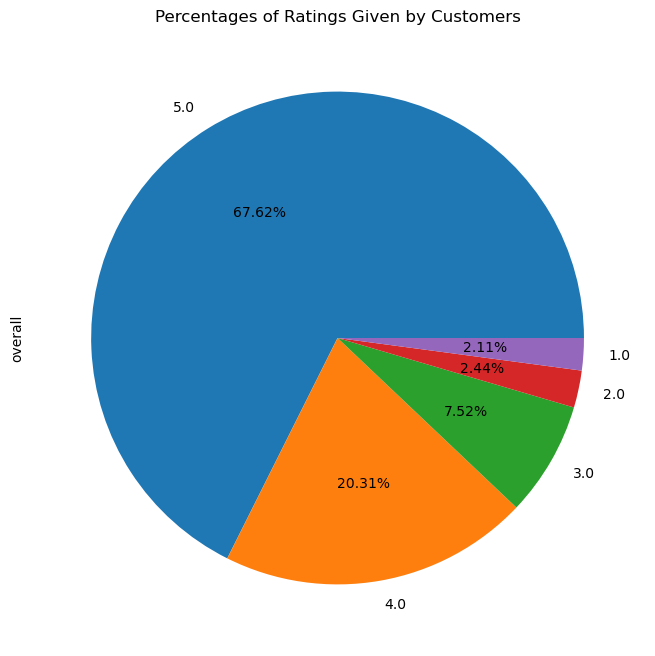

In [91]:
# This helps identify class imbalance and informs model strategy

plt.figure(figsize=(8, 8))  # Set figure size
dataset['overall'].value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',     # Show percentage with 2 decimal places
    fontsize=10,           # Font size for labels
    legend=False           # Do not display legend
)

# Set the title of the chart
plt.title("Percentages of Ratings Given by Customers", loc="center")

# Display the plot
plt.show()

From the chart above, the majority of musical instruments sold on Amazon have perfect ratings of 5.0, meaning the condition of the products are good. If we were to denote that ratings above 3 are positive, ratings equal to 3 are neutral, and ratings under 3 are negative, we know that the number of negative reviews given in the dataset is relatively small. This visualization highlights a strong tendency toward higher ratings, suggesting a potential class imbalance that must be addressed during the modeling phase

##### Labelling Products Based On Ratings Given

The dataset does not have any dependent variable, or in other words we haven't had any prediction target yet. I categorized each sentiment according to ratings given for each row based on the explanation before: Positive Label for products with rating bigger than 3.0, Neutral Label for products with rating equal to 3.0, else Negative Label.

In [92]:
# Labelling Products Based On Ratings Given
# Define sentiment based on numerical ratings

def label_sentiment(row):
    """
    This function assigns a sentiment label based on the numerical product rating.
    If the rating exceeds 3.0, the sentiment is labeled as 'Positive'.
    If the rating is exactly 3.0, the sentiment is labeled as 'Neutral'.
    If the rating is less than 3.0, the sentiment is labeled as 'Negative'.
    """
    if row["overall"] > 3.0:
        return "Positive"
    elif row["overall"] < 3.0:
        return "Negative"
    else:
        return "Neutral"
        
# Apply the labeling function to create a new 'sentiment' column
dataset["sentiment"] = dataset.apply(label_sentiment, axis=1)

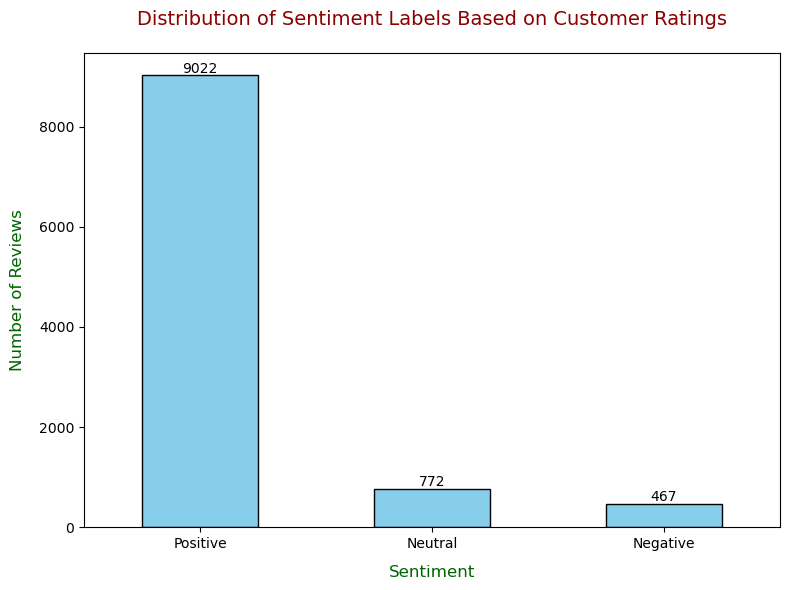

In [93]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
ax = dataset["sentiment"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

# Add value labels on top of each bar
for i, value in enumerate(dataset["sentiment"].value_counts()):
    ax.text(i, value + 50, str(value), ha='center', fontsize=10, color='black')

# Set plot title and axis labels with formatting
plt.title("Distribution of Sentiment Labels Based on Customer Ratings", fontsize=14, color="darkred", pad=20)
plt.xlabel("Sentiment", fontsize=12, color="darkgreen", labelpad=10)
plt.ylabel("Number of Reviews", fontsize=12, color="darkgreen", labelpad=10)

# Customize ticks
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

This distribution clearly shows a dominance of positive sentiment, indicating that most customers were satisfied with their purchases. The Neutral reviews are the least frequent, suggesting that customers are more likely to express either satisfaction or dissatisfaction.

### Text Preprocessing

##### Text Cleaning

In [94]:
def Text_Cleaning(text):
    """
    This function performs a series of preprocessing steps to clean raw text data.
    It standardizes the text by converting all characters to lowercase, removes punctuation
    by replacing it with whitespace, eliminates numerical digits, and strips out any URLs.
    Additionally, it removes newline characters to ensure the text is in a clean, continuous format.
    
    These steps are essential for preparing the data for natural language processing tasks,
    as they help reduce noise and ensure consistency across all input text.
    
    Parameters:
    text (str): A string containing the raw review text.

    Returns:
    str: A cleaned and standardized version of the input text.
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Replace punctuation with whitespace
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    return text


#### Text Processing

In [95]:
# Define custom stopwords set (excluding 'not' for sentiment preservation)
stopwords = set(nltk.corpus.stopwords.words("english")) - {"not"}

def Text_Processing(text):
    """
    This function processes raw input text by performing tokenization,
    removing common English stopwords (while keeping the word 'not' to preserve sentiment context),
    and applying lemmatization to reduce words to their base form.

    The goal of this function is to clean and normalize the textual data to make it more suitable
    for sentiment analysis or other natural language processing tasks.

    Parameters:
    text (str): The raw text string to be processed.

    Returns:
    str: A processed version of the input text with stopwords removed and words lemmatized.
    """
    processed_words = []
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize each word
    for word in tokens:
        if word not in stopwords:
            processed_words.append(lemmatizer.lemmatize(word))

    return " ".join(processed_words)

#### Applying The Functions

In [96]:
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Cleaning(Text))
dataset["reviews"] = dataset["reviews"].apply(lambda Text: Text_Processing(Text))

#### Exploratory Data Analysis

##### - Overview of The Dataset

In [97]:
#Display first 10 rows of the dataset's structure
dataset.head(n = 10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


Based on the overview provided, it is clear that the reviews column is a crucial component for performing sentiment analysis. This text-based feature will serve as the primary input to our model. Using the information contained in customer reviews, my goal is to classify each entry into a corresponding sentiment category such as Positive, Negative, or Neutral.

##### About Other Features

In [98]:
dataset.describe(include = "all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10254,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013",good string five star,Positive
freq,42,163,66,6796,NaN,NaN,40,3,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


The dataset comprises 10,261 Amazon reviews on musical instruments, with key features being the review text, summary, and rating. A combined reviews column was created, and sentiments were labeled based on ratings: Positive (9,022), Neutral (491), and Negative (748), showing class imbalance. Non-text features like reviewerName, helpful, and timestamps were excluded, focusing solely on reviews for sentiment classification.

### Polarity, Review Length, and Word Counts

To strengthen the sentiment analysis in my project, I further examined the reviews by analyzing their polarity using TextBlob. This step provides insight into the emotional orientation of each customer review. I generated a new column called polarity to store these values.

##### Polarity

In [99]:
dataset["polarity"] = dataset["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

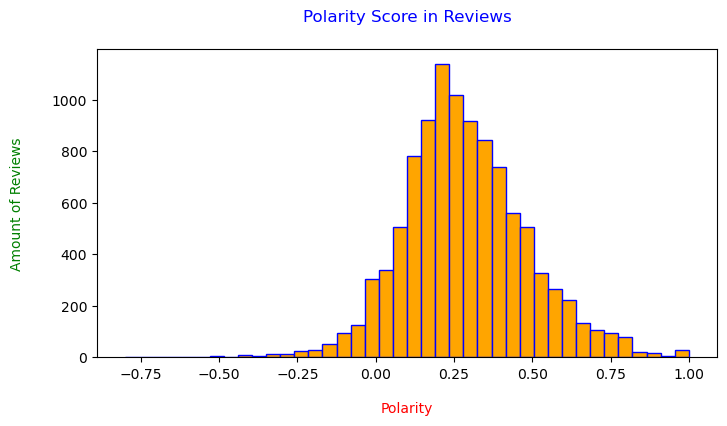

In [100]:
dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (8,4))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")
plt.show()

Reviews with negative polarity will be in range of [-1, 0), neutral ones will be 0.0, and positive reviews will have the range of (0, 1].

From the histogram above, it's that most of the reviews are distributed in positive sentiments, meaning that what we extracted from our analysis before is true. Statistically, this histogram shows that our data is normally distributed, but not with standard distribution. In conclusion, I know for sure that the analysis about the amount of sentiments from the reviews is correct and corresponds to the histogram above.

##### Review Length

In [101]:
dataset["length"] = dataset["reviews"].astype(str).apply(len)

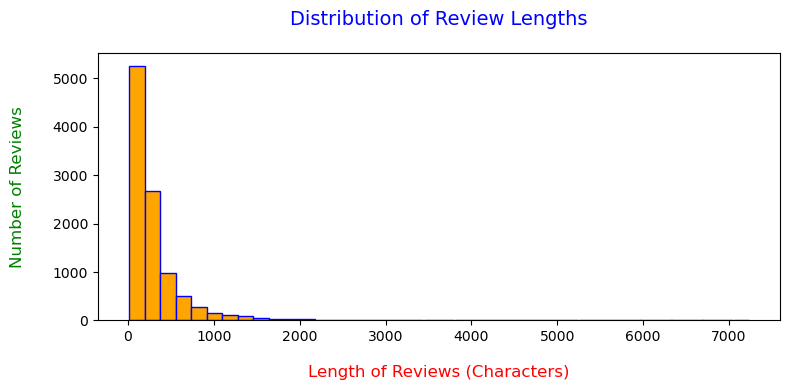

In [102]:
# Calculate and visualize the distribution of review lengths (in characters)
plt.figure(figsize=(8, 4))  # Set the size of the figure

dataset["length"].plot(kind="hist", bins=40, color="orange", edgecolor="blue", linewidth=1)  

# Add descriptive labels and a title for clarity
plt.title("Distribution of Review Lengths", color="blue", pad=20, fontsize=14)
plt.xlabel("Length of Reviews (Characters)", labelpad=15, color="red", fontsize=12)
plt.ylabel("Number of Reviews", labelpad=20, color="green", fontsize=12)

plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()          # Display the histogram

The histogram illustrates the distribution of customer review lengths, measured in the number of characters. Most reviews fall within the 50–300 character range, indicating that users typically leave short to medium-length feedback. This suggests that concise reviews are common in the dataset, and the model must be capable of extracting sentiment even from brief text. The distribution is slightly right-skewed, with a few lengthy reviews extending beyond 1000 characters. These outliers may carry more detailed sentiment but are less frequent. This insight is essential for choosing appropriate preprocessing and modeling techniques.

Of course, the review that we use here is affected by the text preprocessing phase, so the length might not be the actual value of the review itself as some words might have been omitted already. This will also have the same effect when we count the tatal of words in our reviews.

##### Word Counts

In [103]:
# Calculate the number of words in each review by splitting the text and counting the tokens
dataset["word_counts"] = dataset["reviews"].apply(lambda x: len(str(x).split()))

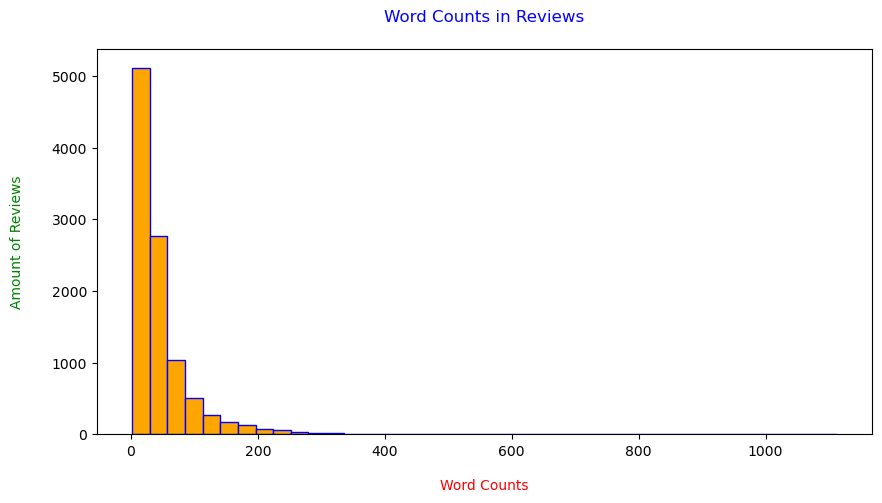

In [104]:
dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))

# Add title and axis labels with color and spacing for better readability
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

Looking at the graph, I can clearly see that most of the customer reviews are very short. The highest bar on the left shows that a large number of reviews contain fewer than 50 words, and very few reviews go beyond 200 words.

This tells me that users usually give quick feedback, often just a sentence or two. Since long reviews are rare, I’ll need to make sure my sentiment analysis model can handle short texts well. This insight helps me plan how to process and train my model more effectively.

### N-Gram Analysis
N-Gram analysis helps me understand common word patterns or sequences in customer reviews.
1. A unigram looks at individual words (e.g., "great")
2. A bigram looks at two-word combinations (e.g., "great sound")
3. A trigram looks at three-word combinations (e.g., "great sound quality")
This helped me identify frequent phrases people use when expressing opinions, which can improve insights for my sentiment analysis

#### N-Gram Function

In [105]:
# def Gram_Analysis(Corpus, Gram, N):
#   # Vectorizer
#   Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

#   # N-Grams Matrix
#   ngrams = Vectorizer.fit_transform(Corpus)

#   # N-Grams Frequency
#   Count = ngrams.sum(axis=0)

#   # List of Words
#   words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

#   # Sort Descending With Key = Count
#   words = sorted(words, key = lambda x:x[1], reverse = True)

#   return words[:N]

In [107]:
def gram_analysis(corpus, gram=2, top_n=20):
    """
    This function analyzes the given text data to extract the most frequent word combinations,
    based on the specified N-Gram size. For example, if 'gram=2', it will return the most
    common two-word phrases (bigrams) in the text.

    It uses a CountVectorizer to convert the text into a frequency matrix of N-Grams,
    filters out common stopwords (excluding 'not'), and then sorts the N-Grams by how often they appear.
    Finally, it returns the top N most frequent N-Gram phrases and their corresponding counts.
    """
    vectorizer = CountVectorizer(stop_words=Stopwords, ngram_range=(gram, gram))  # Convert text into N-Gram counts
    ngram_matrix = vectorizer.fit_transform(corpus)  # Create the matrix
    count_values = ngram_matrix.sum(axis=0)  # Sum up frequencies for each N-Gram
    ngram_freq = [(ngram, count_values[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]  # Pair N-Grams with their count
    sorted_ngrams = sorted(ngram_freq, key=lambda x: x[1], reverse=True)  # Sort in descending order of frequency
    return sorted_ngrams[:top_n]  # Return the top N most frequent phrases


I usedthis function to analyze the review texts and identify the most frequently occurring word patterns. This helps me understand the common phrases that customers use when talking about musical instruments. Whether it’s a single word (unigram), a two-word phrase (bigram), or a three-word phrase (trigram), this function finds and ranks them by how often they appear. It gives me a clearer view of the language and expressions used in the reviews, which is useful for both exploratory analysis and feature engineering in sentiment classification.

###### Filter The DataFrame Based On Sentiments

In [108]:
# Use dropna() so the base DataFrame is not affected
positive_reviews = dataset[dataset["sentiment"] == "Positive"].dropna()
neutral_reviews = dataset[dataset["sentiment"] == "Neutral"].dropna()
negative_reviews = dataset[dataset["sentiment"] == "Negative"].dropna()

To better analyze each sentiment group, I created three new DataFrames — one each for positive, neutral, and negative reviews. I also used dropna() to make sure there are no missing values in these subsets. This way, the main dataset stays unchanged, and I can work with clean, sentiment-specific data for more accurate analysis like N-Grams or word clouds.

### NEW CLEARNED DATASET AS CORPUS

In [109]:
# Save the cleaned dataset as a CSV file named 'clean_corpus.csv'
dataset.to_csv("clean_corpus.csv", index=False)

print("Clean corpus has been successfully saved as 'clean_corpus.csv'.")

Clean corpus has been successfully saved as 'clean_corpus.csv'.


In [110]:
# Save only the cleaned reviews and sentiment columns
dataset[["reviews", "sentiment"]].to_csv("clean_re_sen_corpus.csv", index=False)

print("Reviews and Sentiment columns have been saved successfully as clean_re_sen_corpus.csv")

Reviews and Sentiment columns have been saved successfully as clean_re_sen_corpus.csv


After cleaning and preprocessing the original dataset, removing punctuation, lowercasing, eliminating stopwords (except “not”), lemmatizing, and creating sentiment labels, the data was structured and ready for analysis or model training. Saving this cleaned version to a new CSV file serves multiple purposes:
1. Preservation: It keeps your processed data separate from the raw dataset, preventing accidental changes.
2. Reusability: You can load the clean data directly in future sessions without repeating the entire preprocessing pipeline.
3. Portability: It allows you to easily share your cleaned corpus with others or use it in different tools or scripts.
4. Efficiency: It saves time and computing resources during future experimentation or deployment phases.

#### Unigram of Reviews Based on Sentiments
Here, understanding the most frequently used words in reviews helps uncover common patterns or expressions linked to specific sentiments. By performing unigram analysis **(i.e., analyzing single words)**, I can identify what words appear most in positive, neutral, or negative reviews. 

This provides insight into customer language and behavior, which can enhance model accuracy and interpretability.

In [111]:
import matplotlib.pyplot as plt

In [121]:
def plot_top_unigrams(dataset, sentiment_label, color="green"):
    """
    This function plots the top 20 unigrams for the specified sentiment from the dataset.
    It filters the dataset based on the sentiment label, performs unigram analysis,
    and then displays a horizontal bar chart showing the frequency of the most common words.
    
    Parameters:
    dataset (pd.DataFrame): A DataFrame containing at least the columns 'sentiment' and 'reviews'.
    sentiment_label (str): The sentiment category to filter by, such as 'Positive', 'Negative', or 'Neutral'.
    color (str, optional): The color to use for the bars in the plot. The default color is green.

    The function assumes that a Gram_Analysis function is defined elsewhere, which takes a series of texts,
    the value of n for n-grams (set to 1 for unigrams), and the number of top n-grams to return.
    """
    # Filter data by sentiment and drop missing values in reviews
    subset = dataset[dataset["sentiment"] == sentiment_label].dropna(subset=["reviews"])

    # Run unigram analysis
    top_unigrams = Gram_Analysis(subset["reviews"], n=1, top_n=20)

    # Convert results to a DataFrame
    unigram_df = pd.DataFrame(top_unigrams, columns=["Words", "Counts"])

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = unigram_df.groupby("Words").sum()["Counts"].sort_values().plot(
        kind="barh",
        color=color,
        ax=ax,
        legend=True,
        label="Word Frequency"
    )

    # Add count labels next to each bar
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(width + 2, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center', fontsize=9)

    # Set title and axis labels with styling
    ax.set_title(f"Top Unigrams in {sentiment_label} Sentiment Reviews", fontsize=15, color=color, pad=25, loc="center")
    ax.set_xlabel("Frequency", fontsize=10, color="magenta", labelpad=15)
    ax.set_ylabel("Words", fontsize=10, color="cyan", labelpad=15)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.show()


In [122]:
plot_top_unigrams(dataset, "Positive", color="green")
plot_top_unigrams(dataset, "Negative", color="red")
plot_top_unigrams(dataset, "Neutral", color="blue")

TypeError: Gram_Analysis() got an unexpected keyword argument 'n'

These unigrams are not really accurate, because we can clearly see that even for postive sentiments, the top unigram is the wird guitar which is an object, though from here we might know that the most frequently bought items are guitars or the complement of it. We should try to find the bigram and see how accurate it can describe each sentiments

#### Bigram of Reviews Based On 
I knew that individual words alone might miss important context, so I included bigrams to see pairs of words that often appear together. This helped me uncover common phrases and expressions people use to convey their feelings more clearly, such as **work well** or **great work**. Bigrams gave me a richer understanding of sentiment by showing how words combine to express meaning.

In [60]:
def plot_top_bigrams(dataset, sentiment_label, color="green"):
    """
    This function performs bigram analysis on reviews filtered by a specified sentiment
    and visualizes the top 20 most frequent bigrams in a horizontal bar chart.

    Bigrams are pairs of consecutive words that often capture common phrases or expressions
    better than single words (unigrams). Analyzing bigrams helps understand common word
    combinations, providing richer insight into sentiment-specific language patterns.

    Parameters:
    - dataset (pd.DataFrame): DataFrame with 'sentiment' and 'reviews' columns.
    - sentiment_label (str): Sentiment to filter the reviews (e.g., 'Positive', 'Negative', 'Neutral').
    - color (str): Color used for the bars in the plot.

    The function assumes a `Gram_Analysis` function is defined elsewhere,
    which accepts the reviews, the n-gram length (2 for bigrams), and the number of top n-grams.
    """
    # Filter reviews by sentiment and drop missing
    subset = dataset[dataset["sentiment"] == sentiment_label].dropna(subset=["reviews"])

    # Run bigram analysis
    top_bigrams = Gram_Analysis(subset["reviews"], n=2, top_n=20)

    # Convert to DataFrame
    bigram_df = pd.DataFrame(top_bigrams, columns=["Words", "Counts"])

    # Plot bigrams
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = bigram_df.groupby("Words").sum()["Counts"].sort_values().plot(
        kind="barh",
        color=color,
        ax=ax,
        legend=True,
        label="Bigram Frequency"
    )

    # Add count labels next to each bar
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height() / 2, str(int(width)), va='center', fontsize=9)

    # Titles and labels
    ax.set_title(f"Bigram of Reviews with {sentiment_label} Sentiments", loc="center", fontsize=15, color="blue", pad=25)
    ax.set_xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
    ax.set_ylabel("Top Bigrams", color="cyan", fontsize=10, labelpad=15)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.show()


In [61]:
plot_top_bigrams(dataset, "Positive", color="green")
plot_top_bigrams(dataset, "Negative", color="red")
plot_top_bigrams(dataset, "Neutral", color="orange")

NameError: name 'Gram_Analysis' is not defined

The bigrams work better than the unigrams, because we can actually see some phrases that really describe what a good sentiment is. Although, in some parts we can still see guitar objects as the top words, which make us believe that our interpretation about the most selling items are related to guitars.



In [70]:
# Using Gram_Analysis separately
top_bigrams = Gram_Analysis(dataset[dataset["sentiment"]=="Negative"]["reviews"], n=2, top_n=10)
print(top_bigrams)

[('not good', 31), ('would not', 28), ('sound like', 22), ('not work', 22), ('get pay', 19), ('planet wave', 19), ('work well', 18), ('much better', 17), ('electric guitar', 17), ('not recommend', 17)]


#### Trigram of Reviews Based On Sentiments
To dig even deeper, I looked at trigrams, three-word sequences that
revealed more specific phrases and recurring themes that can better capture the tone or intensity of a review. Trigrams helped me identify typical expressions that are unique to different sentiment groups, giving me a more nuanced perspective on how customers articulate their experiences.

In [69]:
def plot_positive_trigrams(dataset, top_n=20, color="green"):
    """
    This function analyzes and visualizes the most frequent trigrams in reviews with positive sentiment.
    It filters the dataset to include only positive reviews, performs trigram analysis to find the most common three-word phrases,
    and then plots the top trigrams in a horizontal bar chart.

    The purpose of trigram analysis is to capture common word sequences that can provide deeper insight into the language patterns
    used in positive reviews. This helps in understanding the typical expressions and phrases that characterize positive sentiment.

    Parameters:
    dataset (pd.DataFrame): A DataFrame containing at least two columns, 'sentiment' and 'reviews'.
    top_n (int): The number of top trigrams to display in the plot. The default value is 20.
    color (str): The color used for the bars in the plot. The default color is green.

    The function assumes that a separate function called Gram_Analysis is available for extracting n-grams from the text data.
    """
    # Filter positive reviews and drop missing entries
    positive_reviews = dataset[dataset["sentiment"] == "Positive"].dropna(subset=["reviews"])

    # Perform trigram analysis using the Gram_Analysis function
    trigram_counts = Gram_Analysis(positive_reviews["reviews"], n=3, top_n=top_n)

    # Convert the result to a DataFrame for easier plotting
    trigram_df = pd.DataFrame(trigram_counts, columns=["Words", "Counts"])

    # Plot the trigrams in a horizontal bar chart
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = trigram_df.groupby("Words").sum()["Counts"].sort_values().plot(
        kind="barh", color=color, ax=ax, legend=True, label="Trigram Frequency"
    )

    # Add count labels next to each bar
    for bar in ax.patches:
        width = bar.get_width()
        ax.text(width + 1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', fontsize=9)

    # Set plot title and labels
    ax.set_title("Trigram of Reviews with Positive Sentiments", loc="center", fontsize=15, color="blue", pad=25)
    ax.set_xlabel("Total Counts", color="magenta", fontsize=10, labelpad=15)
    ax.set_ylabel("Top Trigrams", color="cyan", fontsize=10, labelpad=15)

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.legend(loc="lower right")
    plt.show()

In [70]:
plot_positive_trigrams(dataset)

NameError: name 'Gram_Analysis' is not defined

In [71]:
# Top trigrams for Neutral sentiment
top_trigrams_neutral = Gram_Analysis(dataset[dataset["sentiment"] == "Neutral"]["reviews"], n=3, top_n=10)
print("Top Trigrams - Neutral Sentiment:")
print(top_trigrams_neutral)

NameError: name 'Gram_Analysis' is not defined

In [72]:
# Top trigrams for Negative sentiment
top_trigrams_negative = Gram_Analysis(dataset[dataset["sentiment"] == "Negative"]["reviews"], n=3, top_n=10)
print("\nTop Trigrams - Negative Sentiment:")
print(top_trigrams_negative)

NameError: name 'Gram_Analysis' is not defined

We can say that the trigrams are slightly better to describe each sentiments, although negative trigrams say a lot about bad products which we can infer from the top words above. From the N-Gram Analysis, we can also see how the decision of not removing not in our list of stopwords affects our data as we keep the meaning of negation phrases.



### Word Clouds

##### Word Cloud of Reviews with Positive Sentiments

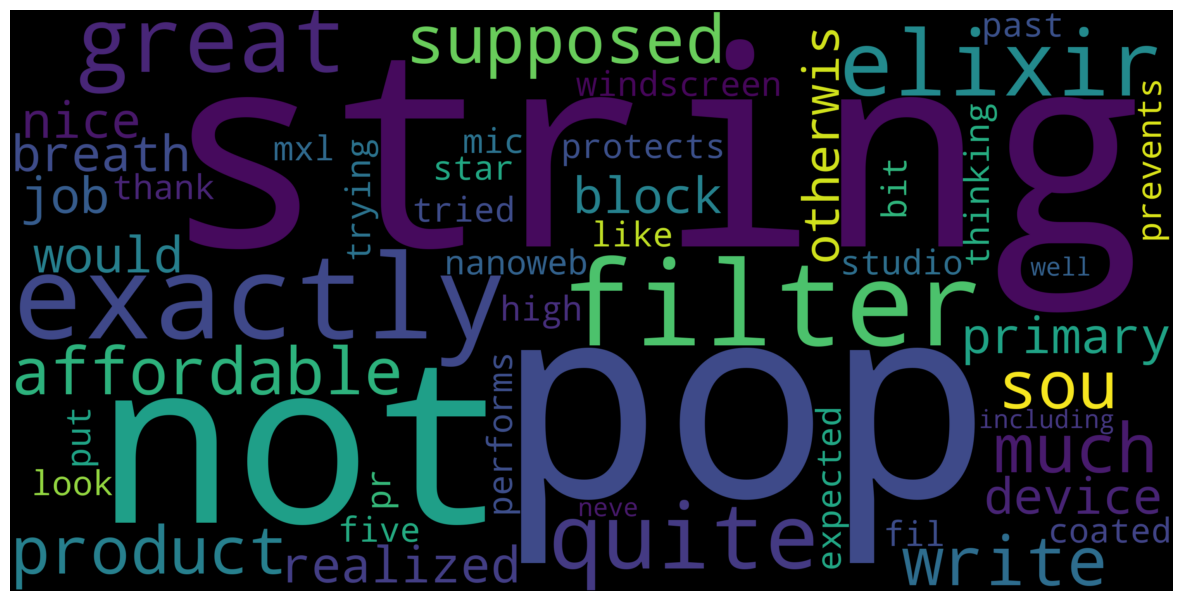

In [39]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Word Cloud of Reviews with Neutral Sentiments

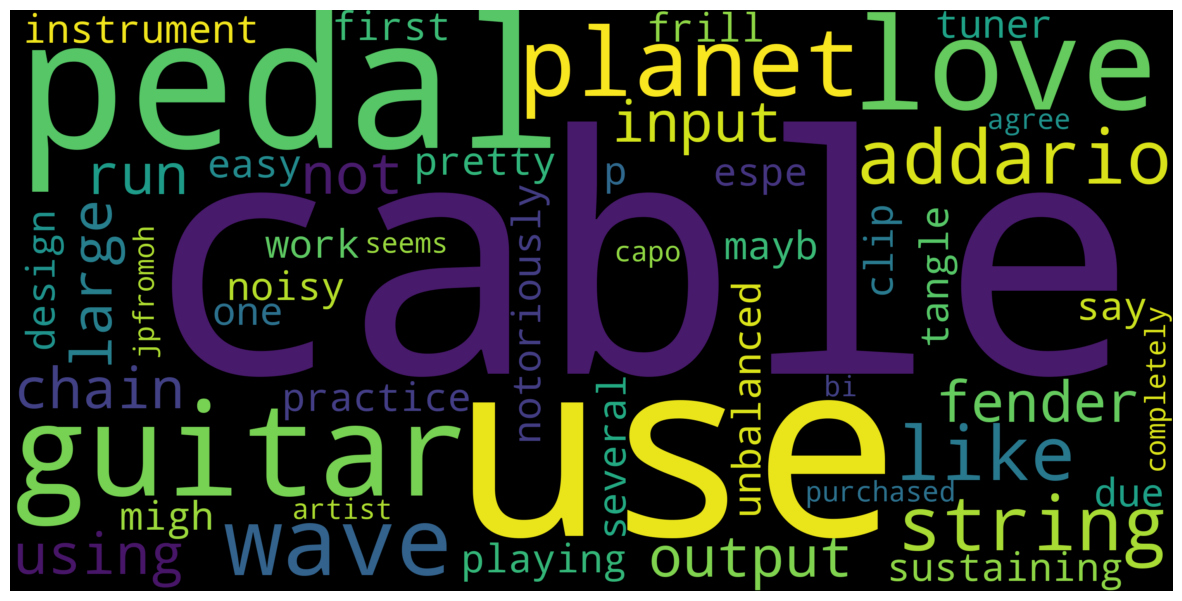

In [40]:

wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Word Cloud of Reviews with Negative Sentiments

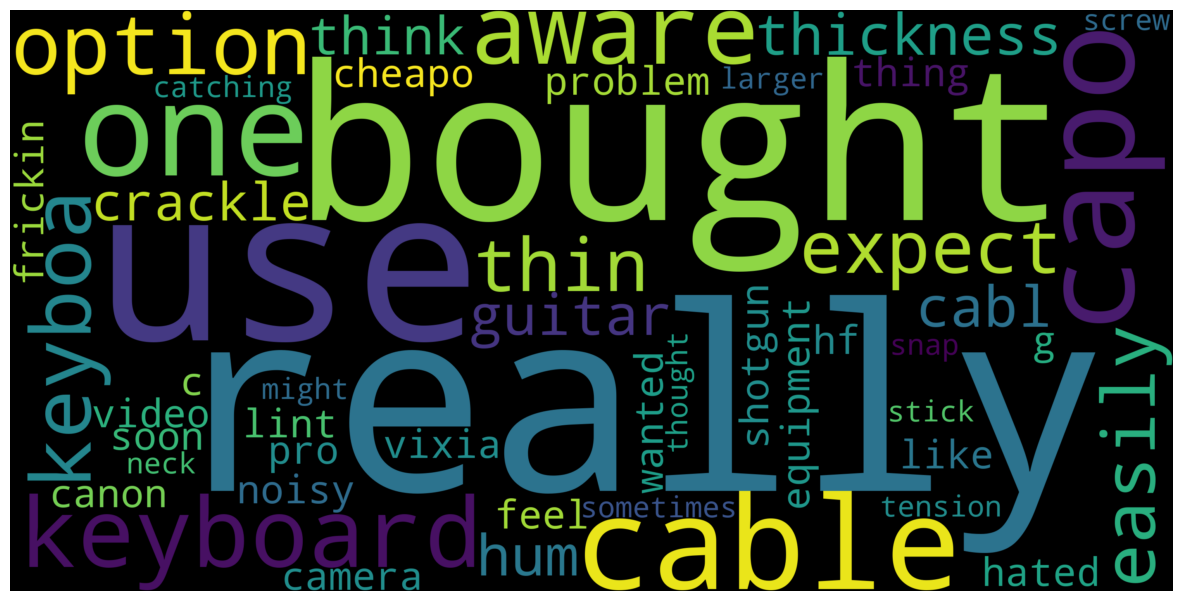

In [41]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

From these word clouds, not only we can see words that really describe our sentiments, but just like our N-Grams Analysis we can see objects being discussed in the reviews given.

### Feature Engineering

##### Drop Insignificant Columns

In [42]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
dataset.drop(columns = Columns, axis = 1, inplace = True)

We dropped these columns to make our dataset concise. We now have two columns as our independent variables and the last column as dependent variables. To continue, we must encode our label as a set of numbers corresponding to each categories of it.

##### Current State of The Dataset

In [43]:
dataset.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


##### Encoding Our Target Variable

In [44]:
Encoder = LabelEncoder()
dataset["sentiment"] = Encoder.fit_transform(dataset["sentiment"])

In [45]:
dataset["sentiment"].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

We had successfully encoded our sentiment into numbers so that our model can easily figure it out. From above, we know that the label Positive is encoded into 2, Neutral into 1, and Negative into 0. Now, we have to give importance of each words in the whole review, i.e. giving them weights. We can do this by using TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer.

#### F-IDF Vectorizer

In [46]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(dataset["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [47]:
# Declaring our target variable
y = dataset["sentiment"]

From the shape, we successfully transformed our reviews with TF-IDF Vectorizer of 7000 top bigram words. Now, as we know from before, our data is kind of imbalanced with very little neutral and negative values compared to positive sentiments. We need to balance our dataset before going into modelling process.

#### Resampling Our Dataset

In [48]:
!pip install --upgrade scikit-learn imbalanced-learn threadpoolctl

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


  You can safely remove it manually.


In [49]:
!pip install --upgrade threadpoolctl scikit-learn

There are many ways to do resampling to an imbalanced dataset, such as SMOTE and Bootstrap Method. We will use SMOTE (Synthetic Minority Oversampling Technique) that will randomly generate new replicates of our undersampling data to balance our dataset.


In [50]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [51]:
!pip uninstall numpy scipy scikit-learn -y

Found existing installation: numpy 1.24.4

You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.
You can safely remove it manually.



Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [52]:
!pip uninstall numpy scipy scikit-learn -y

In [53]:
!pip install numpy scipy scikit-learn

  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.2.6 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.2.6 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.15.3 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
streamlit 1.30.0 req

In [54]:
!pip install --upgrade threadpoolctl

In [55]:
!pip install numpy==1.24.4 scipy==1.10.1 scikit-learn==1.3.2



  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [56]:
!pip install numpy==1.24.4 scipy==1.10.1 scikit-learn==1.3.2 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uni

In [57]:
pip uninstall numpy -y

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


In [58]:
!pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)


In [59]:
!pip install mkl

In [73]:
import numpy
import scipy
import sklearn
from imblearn.over_sampling import SMOTE

print(numpy.__version__)
print(scipy.__version__)
print(sklearn.__version__)



1.24.4
1.10.1
1.3.2


In [74]:

Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

NameError: name 'X' is not defined

In [75]:

Counter(y_final)a

SyntaxError: invalid syntax (1620776140.py, line 1)

Now our data is already balanced as we can see from the counter of each sentiment categories before and after the resampling with SMOTE.

### Splitting Our Dataset

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

NameError: name 'X_final' is not defined

We splitted our dataset into 75:25 portion respectively for the training and test set.

### Model Selection and Evaluation
We do not really know what is the best model that fits our data well. Because of that, we will need to try every classification models available and find the best models using the Confusion Matrix and F1 Score as our main metrics, and the rest of the metrics as our support. First, we should do some cross validation techniques in order to find the best model.



### Model Building

We are using K-Fold Cross Validation on our early dataset (before resampling) because the CV itself is not affected by the imbalanced dataset as it splits the dataset and takes into account every validations. If we use the CV on the balanced dataset that we got from resampling we should be able to get similar result.

In [77]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))
     

NameError: name 'X' is not defined

We got six models on our sleeves and from the results of 10-Fold Cross Validation, we know that the Logistic Regression model is the best model with the highest accuracy, slightly beating the SVC. Because of this, we will use the best model in predicting our sentiment, also to tune our parameter and evaluate the end-result of how well the model works.

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
Param = {
    "C": np.logspace(-4, 4, 50),
    "penalty": ['l1', 'l2'],
    "solver": ['liblinear']  # liblinear supports both l1 and l2
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=Param,
    scoring="accuracy",
    cv=10,
    verbose=0,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract best results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Display results
print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)


We got a nice accuracy on our training set, which is 94.80% and from our Grid Search, we are also able to find our optimal hyperparameters. It is time to finish our model using these parameters to get the best model of Logistic Regression.

### Best Model

In [ ]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

Now that our model is done, we will test our model on our test set. The metrics that we will evaluate is based on this prediction that we made here.

### Metrics

##### Accuracy On Test Set

In [ ]:
accuracy_score(y_test, Prediction)

Really high accuracy that we got here, 95.21%. Still, we need to look out for the Confusion Matrix and F1 Score to find out about our model performance.

##### Confusion Matrix

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [ ]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

In [ ]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

What we can gain from the Confusion Matrix above is that the model overall works well. It is able to categorize both positive and neutral sentiments correctly, while it seems to struggle a bit at determining negative sentiments. Of course, this is the effect of imbalanced data that we got from our original dataset, and luckily we can minimize the effect thanks to our SMOTE resampling before.es

#### Classification Scores

In [17]:
print(classification_report(y_test, Prediction))

NameError: name 'y_test' is not defined

Overall, to each of our sentiment categories, we got F1 Score of 95%, which is great and because of that we can conclude that our model works well on the dataset.



### Conclusion

#### Dataset

1. Our dataset contains many features about user reviews on musical instruments. But, we rarely need those features as our model variables because those features are not really important for sentiment analysis.
2. We might need to omit our part of removing stopwords in our preprocessing phase, because there might be some important words in determining user sentiments in our model.

3. From our text analysis, we know that most of the transactions made are related to guitars or other string-based instruments. We can say that guitar got a really high attention from the customers' pool and the sellers can emphasize their products on this instruments.

#### Model

1. We tried almost all classification models available. By using 10-Fold Cross Validation, we get that Logistic Regression Model got the best accuracy and we decided to use this model and tune it.
2. On our attempt on making prediction to our test set, we also received a nice accuracy and high F1 Score. This means that our model works well on sentiment analysis.
3. We need to consider more Cross Validation Method, such as Stratified K-Fold so that we do not really need to do resampling on our dataset. Also, we are fine without data scaling, but it is highly suggested to do it.